<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 3</h5>
<h5>February 27, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

In [201]:
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(viridisLite)
library(viridis)

## Import Diamonds dataset

In [10]:
df <- diamonds
print(df)

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# i 53,930 more rows


## Create a histogram on the diamonds dataset

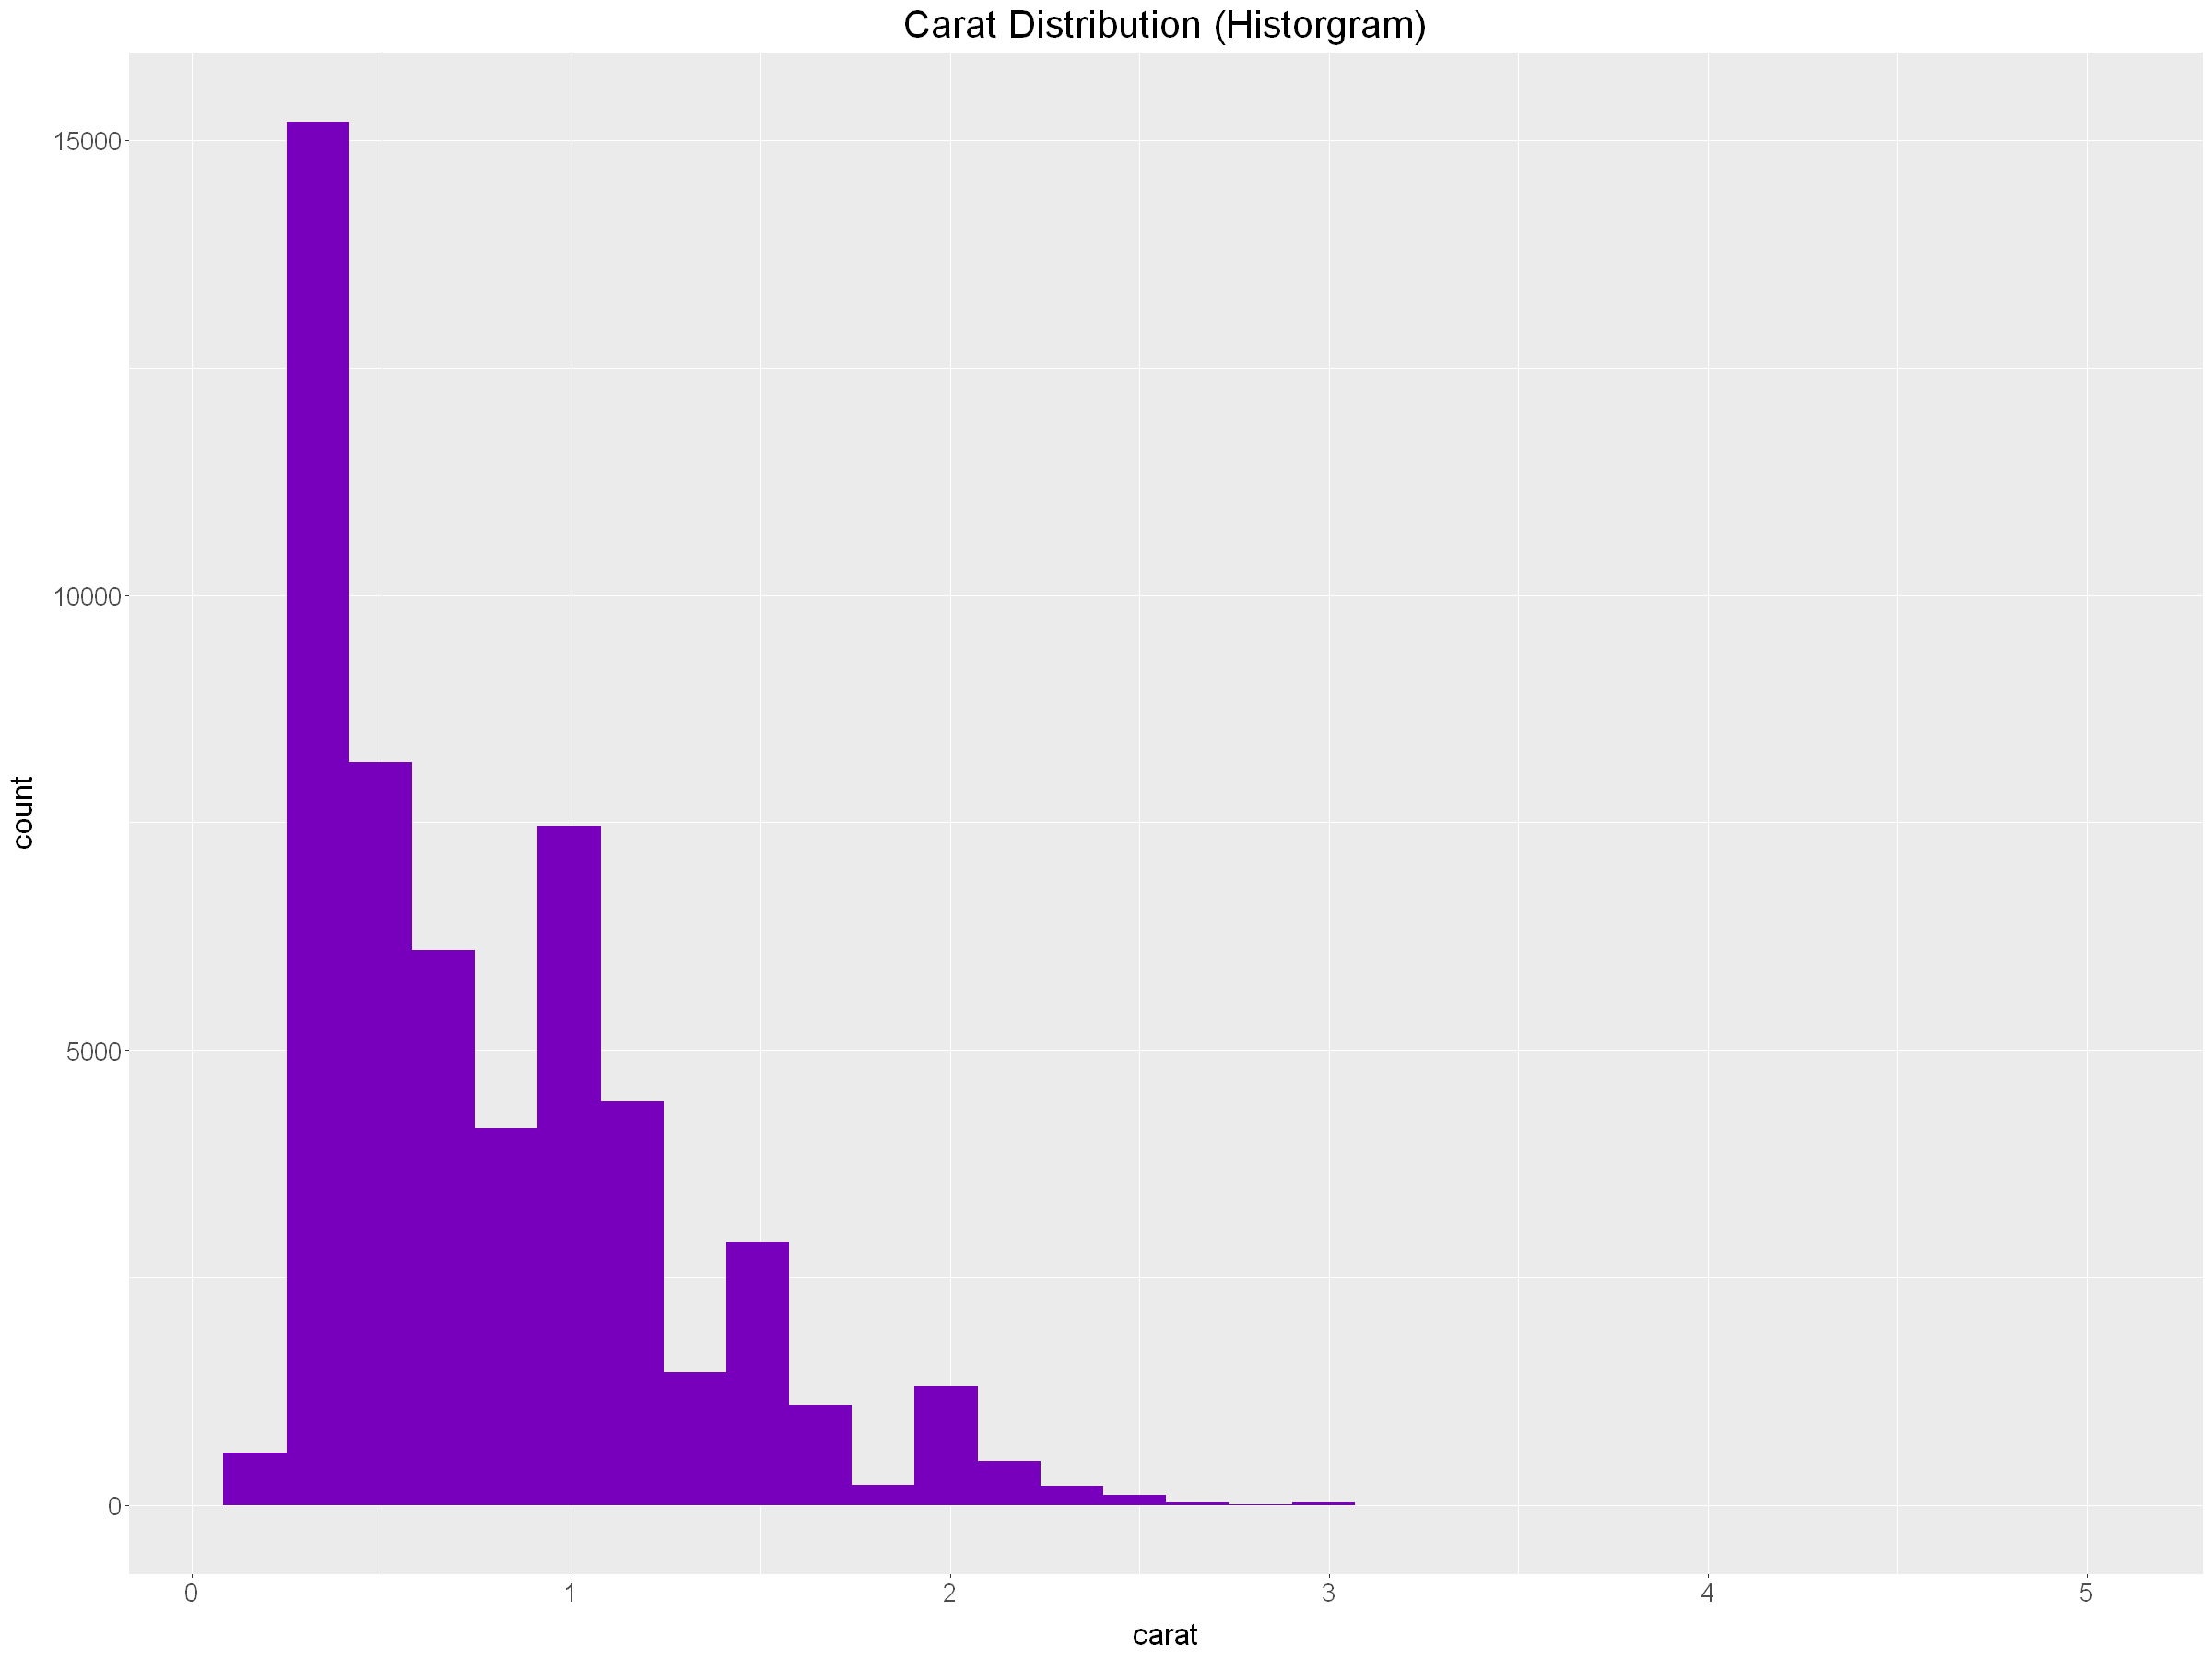

In [135]:
options(repr.plot.width = 20, repr.plot.height = 15)

ggplot() +
  layer(
    data = df,
    mapping = aes(x = carat),
    stat = "bin",
    geom = "bar",
    position = "stack",
    params = list(bins = 30, fill = "#7800bd")
  ) +
ggtitle("Carat Distribution (Historgram)") +
theme(
    plot.title = element_text(hjust = 0.5, size=25),
    axis.title = element_text(size = 20),
    axis.text= element_text(size = 16),
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10)))


## Modify your histogram code so that it uses a different geom

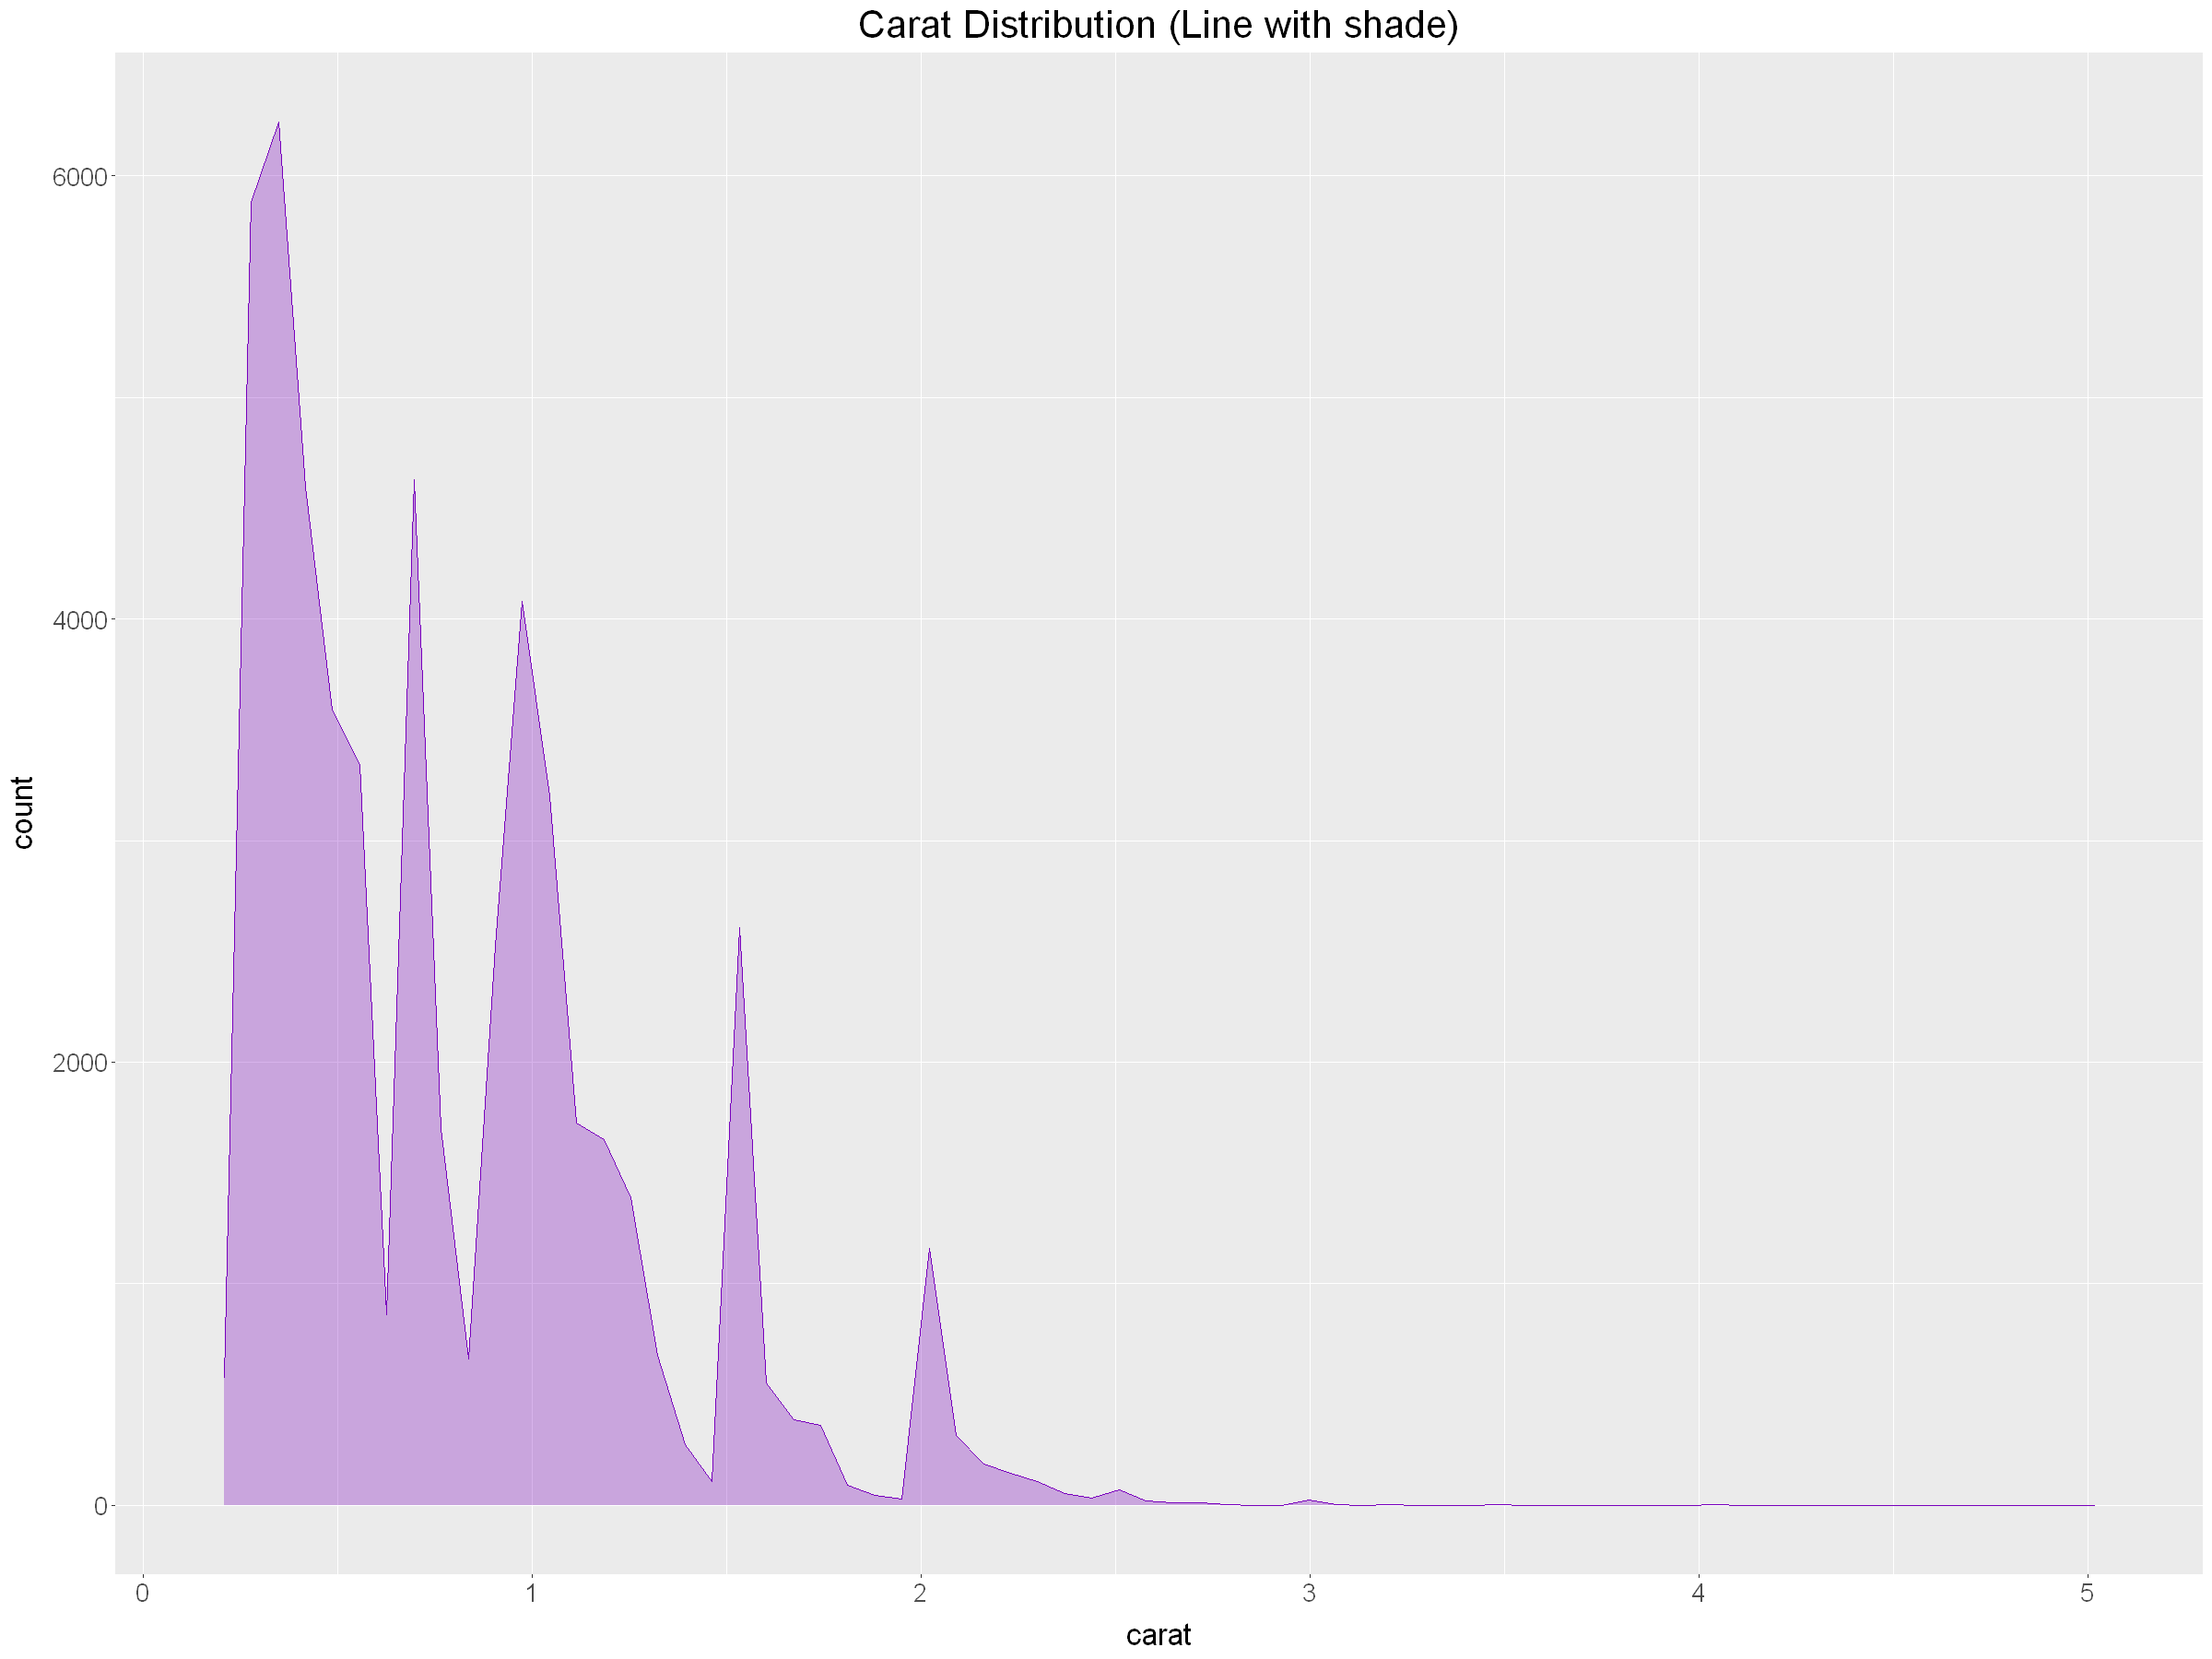

In [131]:
library(ggplot2)

ggplot(diamonds, aes(x = carat)) +
  stat_bin(
    geom = "area",
    bins = 70,
    fill = "#7800bd",
    alpha = 0.3,
    position = "identity"
  ) +
  stat_bin(
    geom = "line",
    bins = 70,
    color = "#7800bd",
    position = "identity"
  ) + 
ggtitle("Carat Distribution (Line with shade)") +
theme(
    plot.title = element_text(hjust = 0.5, size=25),
    axis.title = element_text(size = 20),
    axis.text= element_text(size = 16),
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10)))


## Add an aesthetic mapping from one of the factor variables to the fill or color aesthetic.

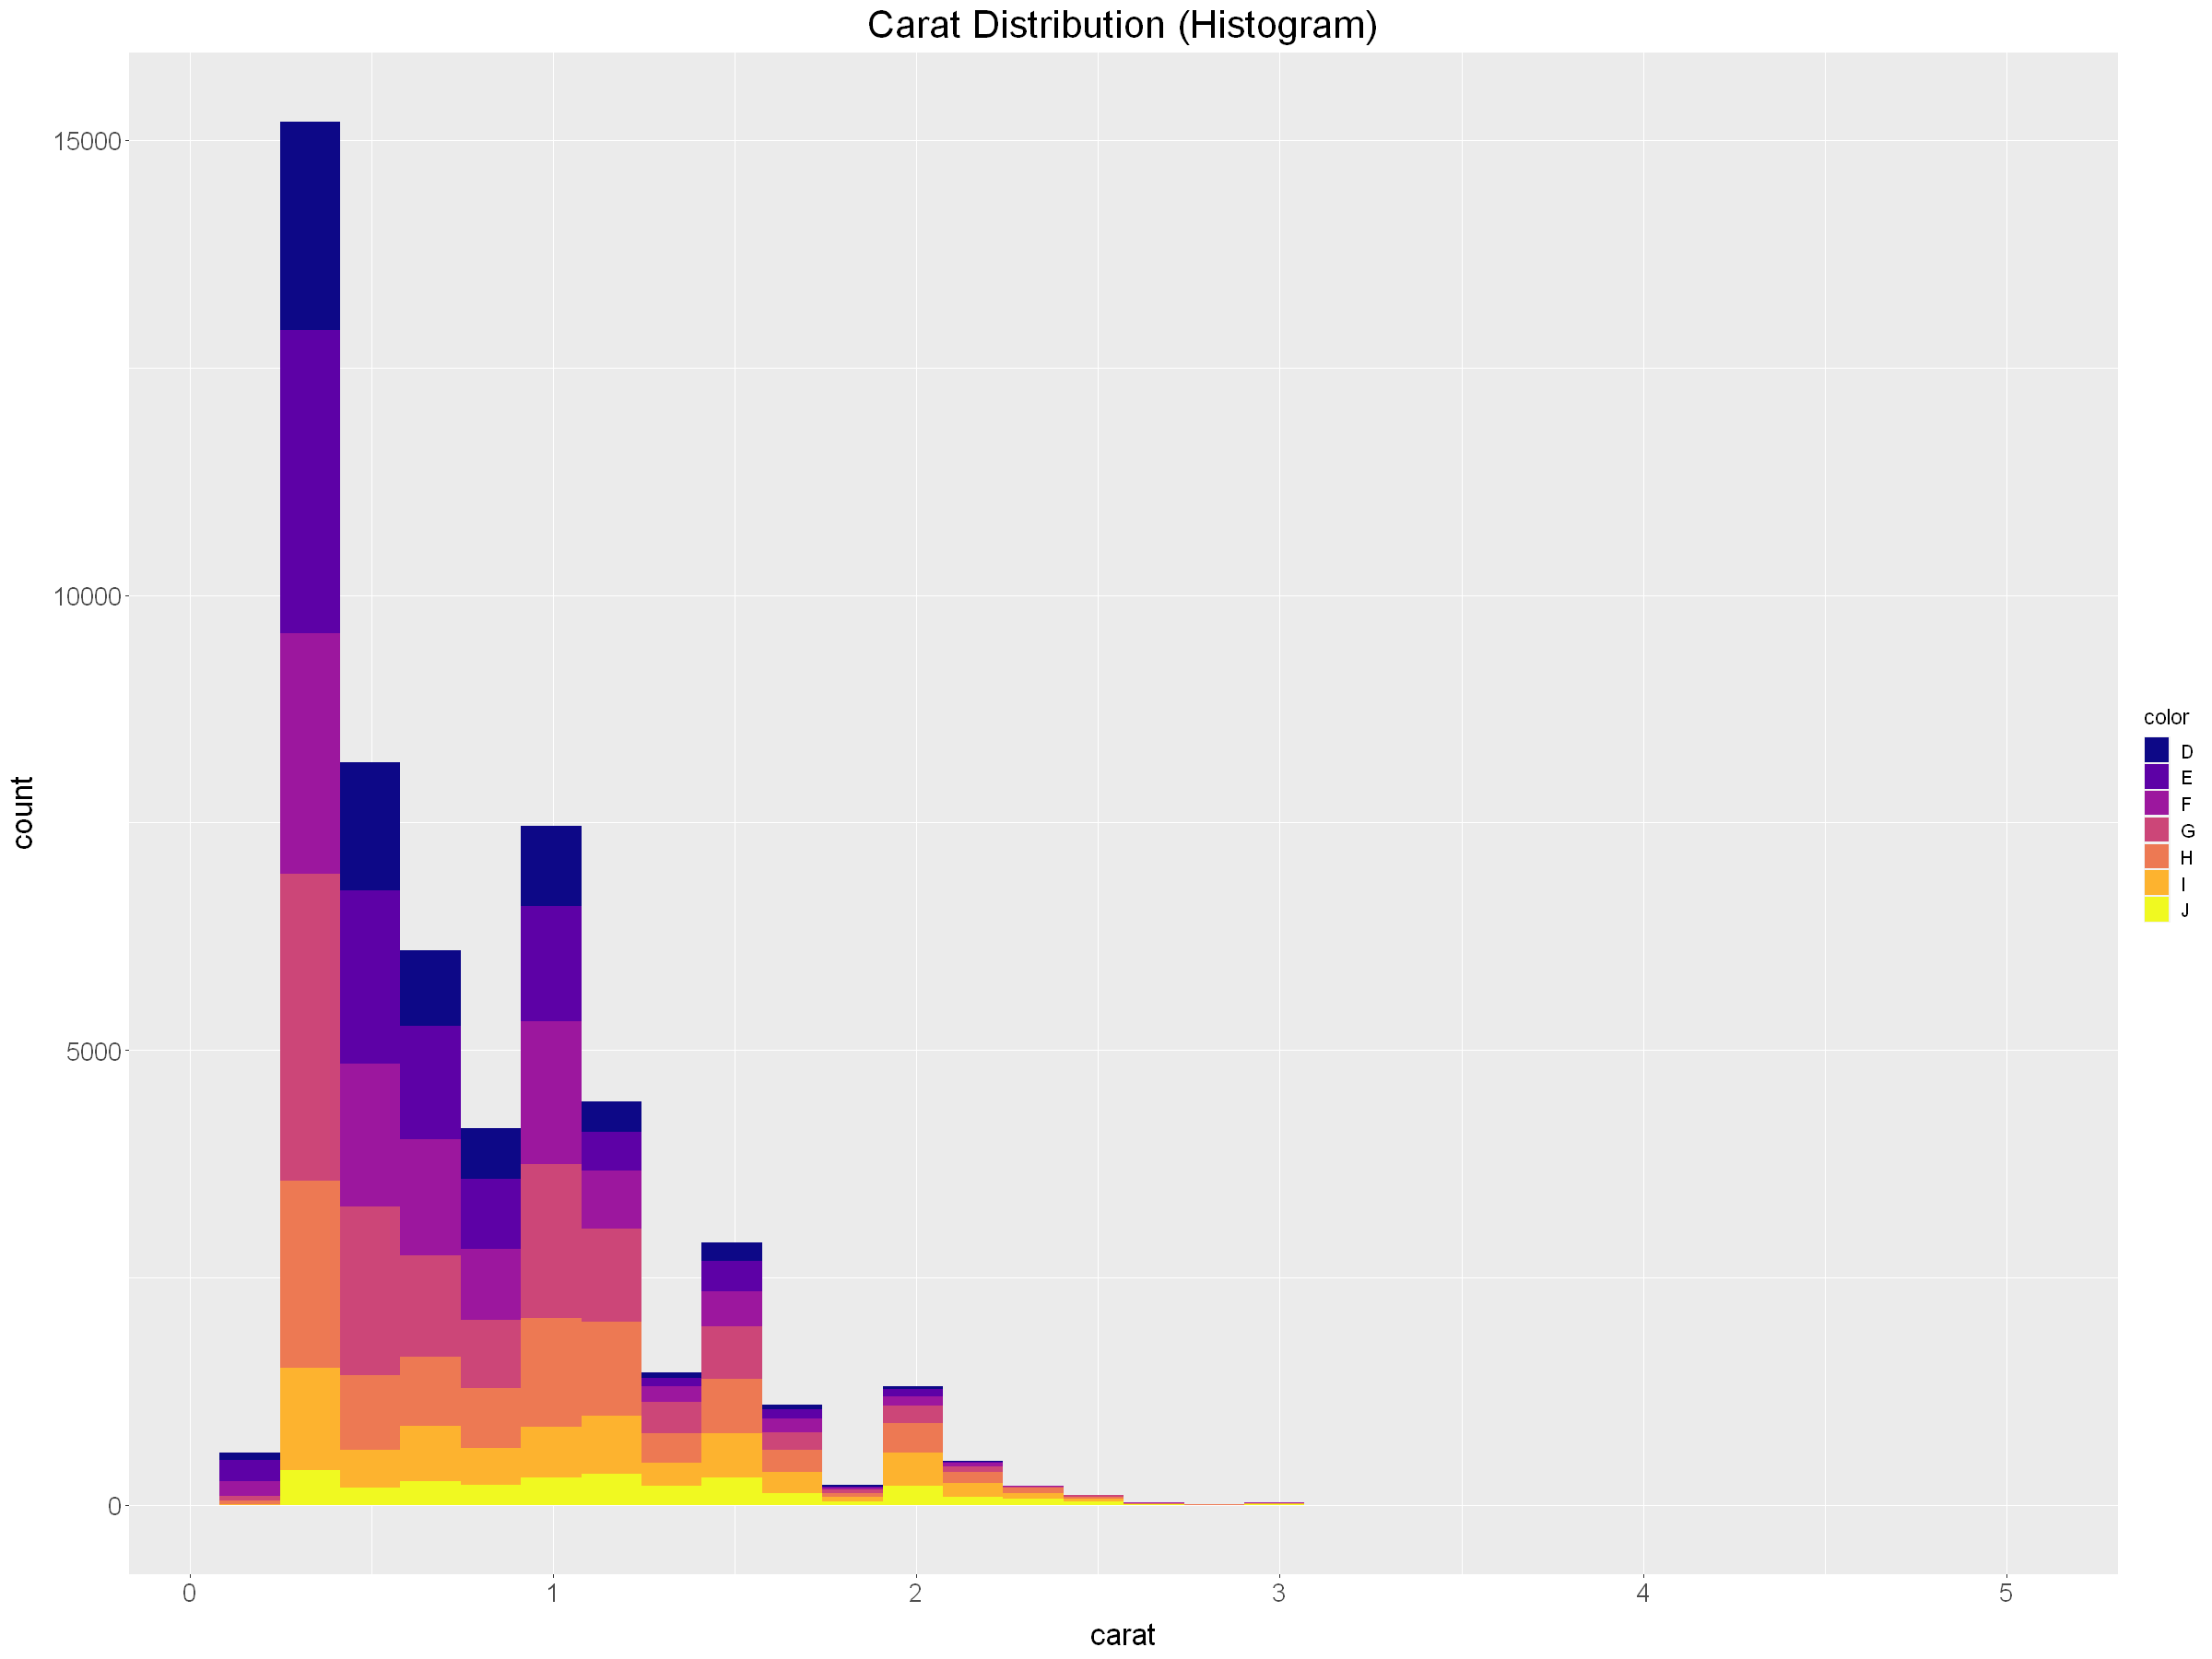

In [199]:
options(repr.plot.width = 20, repr.plot.height = 15)

ggplot() +
    layer(
        data = df,
        mapping = aes(x = carat, fill = color),
        stat = "bin",
        geom = "bar",
        position = "stack",
        params = list(bins = 30)
    ) +
    scale_fill_viridis_d(option = "plasma") + 
    ggtitle("Carat Distribution (Histogram)") +
    theme(
        plot.title = element_text(hjust = 0.5, size = 25),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 10)),  
        axis.title.y = element_text(margin = margin(r = 10)),
        legend.title = element_text(size = 14),
        legend.text  = element_text(size = 12)
    )


##  What is the default position adjustment for a histogram?
The default position for a historgram is "stacked". But we could change this, to 'dodge' for example, by adding a `position='dodge'` argument in the layer function.

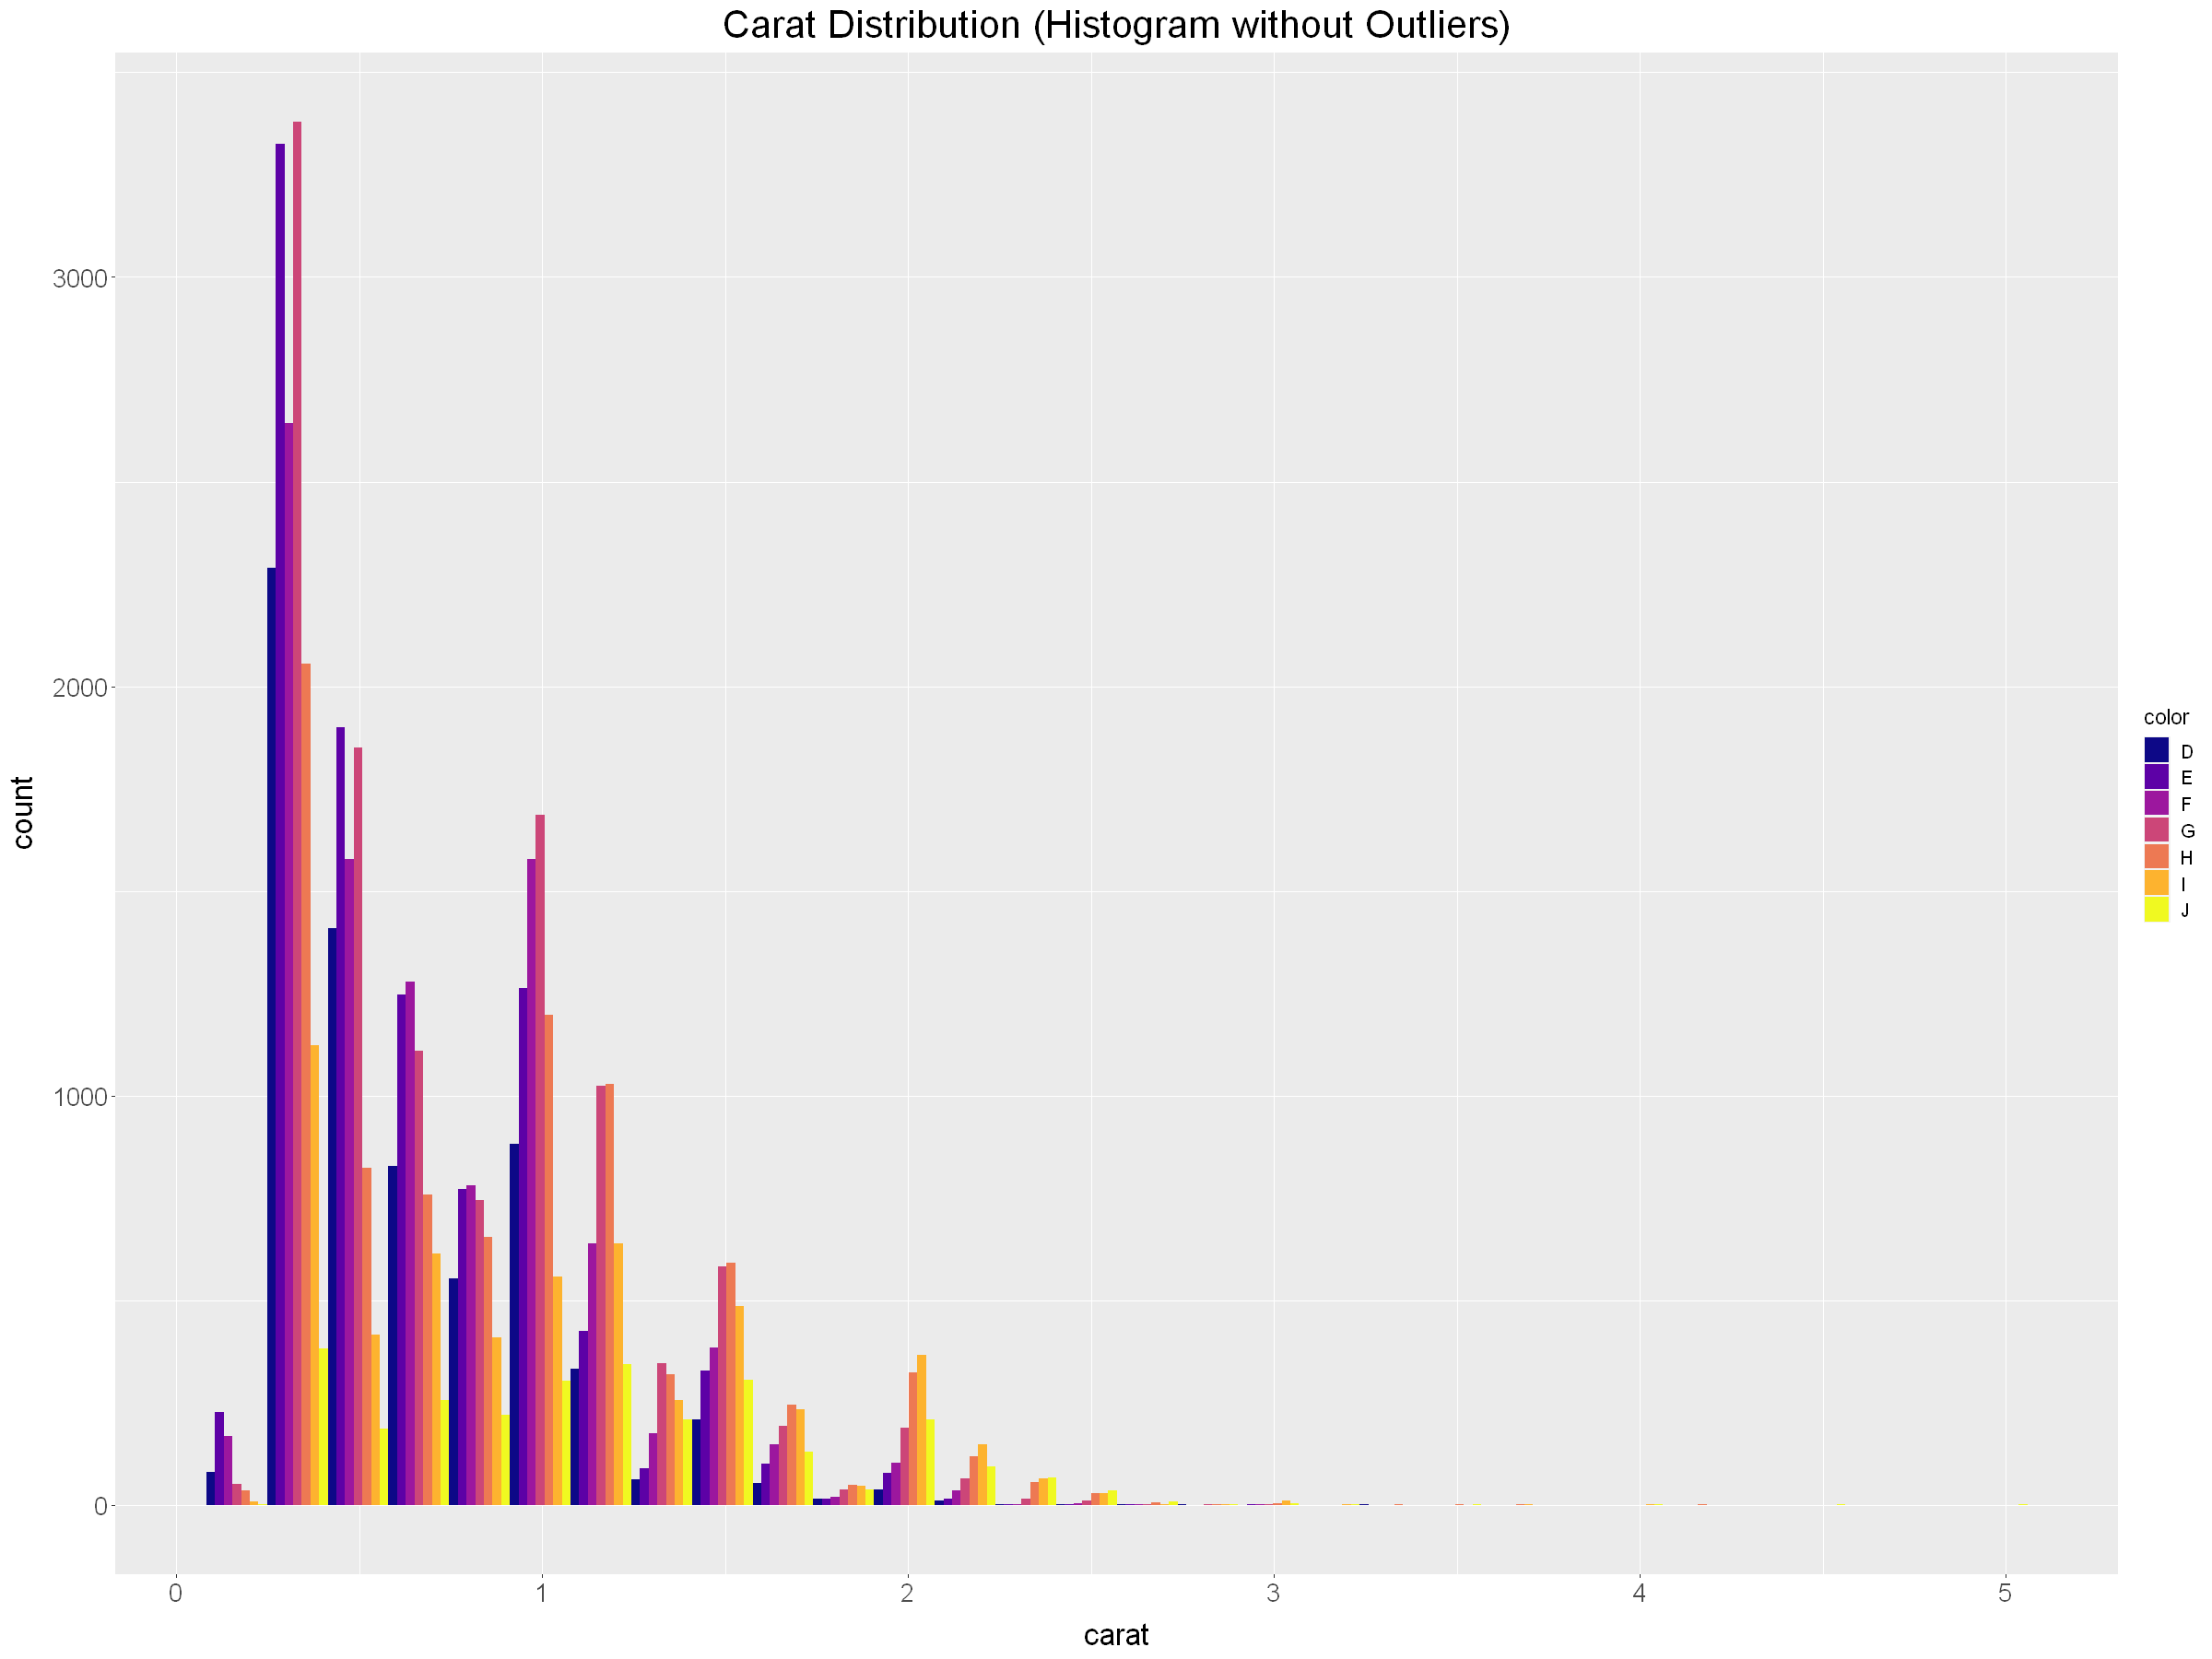

In [194]:
ggplot() +
    layer(data=df,
        mapping = aes(x = carat, fill = color),
        stat = "bin",
        geom = "bar",
        position = "dodge",
        params = list(bins = 30)
    ) +
    scale_fill_viridis_d(option = "plasma") + 
    ggtitle("Carat Distribution (Histogram without Outliers)") +
    theme(
        plot.title = element_text(hjust = 0.5, size = 25),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        legend.title = element_text(size = 14),
        legend.text  = element_text(size = 12)
    )

Let's remove some outliers (using IQR with '3' as a multiplier instead of '1.5') for a more interpretable histogram.

In [186]:
multiplier <- 3
quants <- quantile(df$carat, c(0.25, 0.75)) 
iqr <- diff(quants)
iqr_lower <- quants["25%"] - iqr*multiplier
iqr_upper <- quants["75%"] + iqr*multiplier

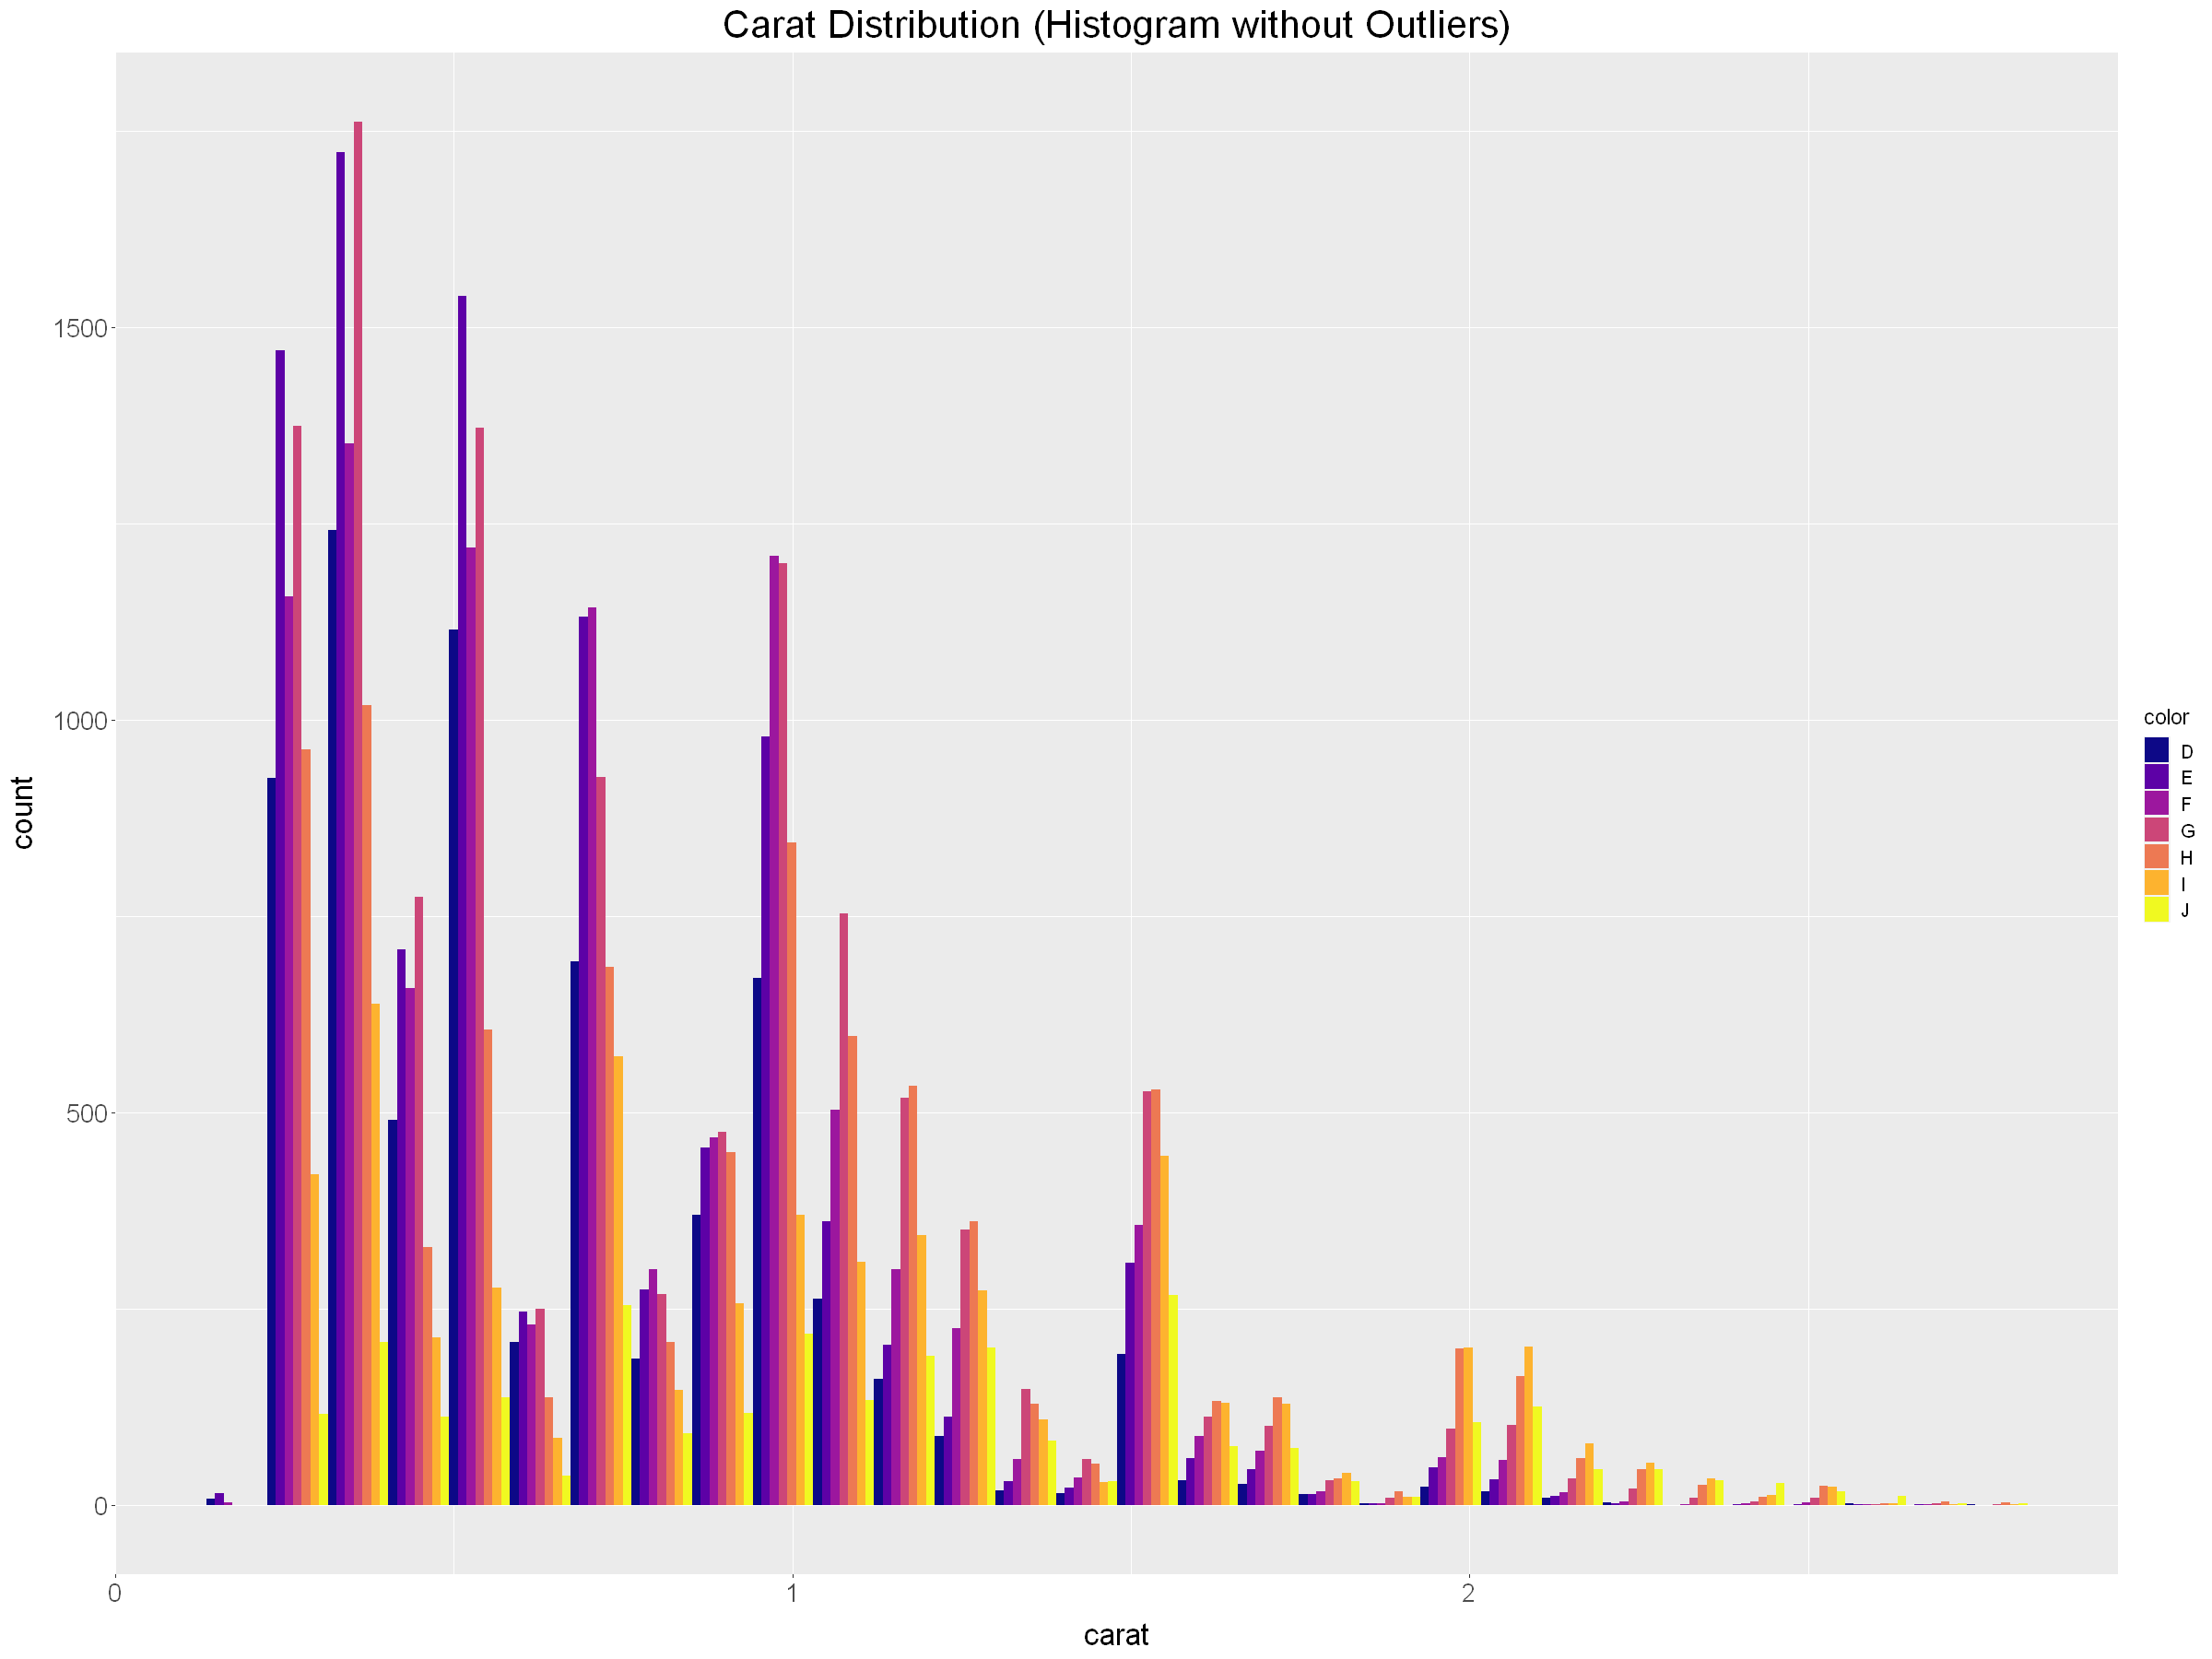

In [190]:
df %>%
filter(between(carat, iqr_lower, iqr_upper)) %>%
ggplot() +
    layer(mapping = aes(x = carat, fill = color),
        stat = "bin",
        geom = "bar",
        position = "dodge",
        params = list(bins = 30)
    ) +
    scale_fill_viridis_d(option = "plasma") + 
    ggtitle("Carat Distribution (Histogram without Outliers)") +
    theme(
        plot.title = element_text(hjust = 0.5, size = 25),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        legend.title = element_text(size = 14),
        legend.text  = element_text(size = 12)
    )

## Interpretation
`Carat Distribution (Histogram without Outliers)` shows the distribution of diamond carat weights, excluding any outliers (using the IQR method with 3 multiplier), grouped by the diamond’s color grade. Most diamonds fall within the lower carat range (roughly 0.2 to 1.0 carats), indicating that smaller diamonds are far more common. The frequency of diamonds decreases as carat size increases—by around 1.5 carats, the counts are significantly lower. This makes a lot of sense since the higher `carat` a diamond have, the rarer it is.

Although it is peculiar to see a small cluster of diamond at the beginning considering it is followed by the a big cluster. This is a rather interesting case that is worth exploring more. They could errors in measuring the carat or some type of placeholder. Although that in and of themselves are outside of the scope of this report.

Visually, we can also see how different color grades stack or compare in each bin: certain color grades appear more frequently in the most common size ranges, but the overall trend holds that diamonds in higher carat bins are less frequent, regardless of color.